<a href="https://colab.research.google.com/github/Rohitkumar1011/Appliance-Energy-Prediction/blob/main/Applicance_Energy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                      APPLICANCE ENERGY PREDICTION

: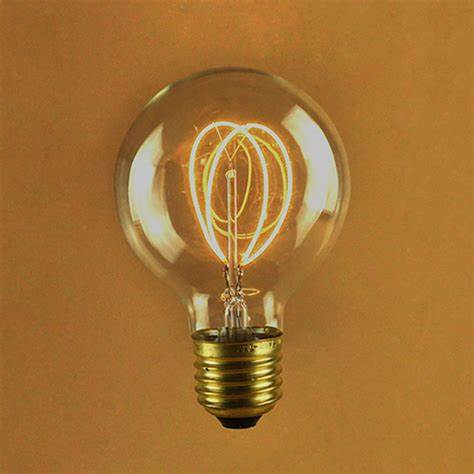


------------------------------------------------------------------------------
**About the dataset:-**
* The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network.
* Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. 
* The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. 
* Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

--------------------------------------------------------------------------------

# Different types of column in dataset:-

* **Date**:-> Time year-month-day hour:minute:second
* **Appliances**-Energy use in Wh (Dependent variable)
* **lights**- energy use of light fixtures in the house in Wh (Drop this column)
* **T1**-Temperature in kitchen area
* **RH1**- Humidity in kitchen are
* **T2**-Temperature in living room area
* **RH2**-Humidity in living room area
* **T3** Temperature in laundry room area
* **RH3**-Humidity in laundry room area
* **T4**- Temperature in office room
* **RH4**- Humidity in office room
* **T5**-Temperature in bathroom
* **RH5**, Humidity in bathroom
* **T6**-Temperature outside the building (north side)
* **RH6**-Humidity outside the building
* **T7**-Temperature in ironing room
* **RH7**-Humidity in ironing room
* **T8**-Temperature in teenager room 2
* **RH8**- Humidity in teenager room 2
* **T9**, Temperature in parents room
* **RH9**, Humidity in parents room,
* **Pressmmhg**, atmospheric pressure 
* **To**, Temperature outside (from Chievres weather station),
Celsius Pressure (from Chievres weather station), in mm Hg 
* **RHout**-> Humidity outside (from Chievres weather station)
* **Wind speed**-> (From Chievres weather station), in m/s
* **Visibility**-> (From Chievres weather station), in km
* **Tdewpoint**-> From Chievres weather station(Â°C)
* **rv1**-> Random variable 1 (nondimensional)
* **rv2**-> Random variable 2 (nondimensional)



--------------------------------------------------------------------------------


# Aim of the project
* **Our aim of the project is to predict the usage of energy in appliances on basis of different variable like temperature,windspeed etc.**

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# DATA ANALYSIS AND PREDICTION:

* **Importing the modules:-**

In [1]:
# Basic modules for data science:-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#--------------------------------------------------------------

# Modules for Data Cleaning:-
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#--------------------------------------------------------------

# Algorithm
from sklearn.linear_model import LinearRegression,RidgeCV,Ridge,LassoCV,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor

#-----------------------------------------------------------------------------------
# Accuracy metrics:-
from sklearn.metrics import r2_score,mean_squared_error


%matplotlib inline
sns.set_style('darkgrid')

* **Loading the dataset:-**

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Loading the dataset to a pandas data frame
data=pd.read_csv('/content/drive/MyDrive/Datasets/data_application_energy.csv')

# 1. Data Understanding

 1.1     **First 4 rows of dataset:-**





In [4]:
# Print 4 rows of dataframe
data.head(4)  

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  

[4 rows x 29 columns]

1.2. **Last 4 rows of dataset:-**

In [5]:
# Print Last 5 rows
data.tail(5)

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

1.3. **Shape of the datset:-**

In [6]:
# print shape of the dataset
print('Shape of the dataset:-',end='')
data.shape

Shape of the dataset:-

(19735, 29)

1.4. **Data Types of columns and non-missing values:-**

In [7]:
# Complete information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

* Most of the columns are of int and float.
* Only one columns 'date' is of object which can be converted to timestamp.

1.5. **Statistical Description of dataset:-**

In [8]:
data.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

# 2. Data Preprocessing

2.1. **Changing data type of date column to Time Stamp object:-**

In [9]:
# object type to datetime
data['date']=pd.to_datetime(data['date'])  

* To extract months and week day we need to convert date object to data type.

-----------------------------------------------------------------------------------------
2.2. **Extracting week name and month name from dataset:-**

In [10]:
# Extracting weekday and month from date column
data['weekday']=data['date'].dt.day_name()
data['month']=data['date'].dt.month_name()

------------------------------------------------------------------------------------------
2.3. **Renaming columns names :-**

In [12]:
# rename column name
data = data.rename(columns={'T1':'Temp_kitchen','RH_1':'Humid_kitchen',
                            'T2':'Temp_living','RH_2':'Humid_living',
                            'T3':'Temp_laundry','RH_3':'Humid_laundry','T4':'Temp_office',
                            'RH_4':'Humid_office','T5':'Temp_bathroom','RH_5':'Humid_bathroom',
                            'T6':'Temp_north','RH_6':'Humid_north','T7':'Temp_ironing','RH_7':'Humid_ironing',
                            'T8':'Temp_teenage','RH_8':'Humid_teenage','T9':'Temp_parent','RH_9':'Humid_parent',
                            'T_out':'Temp_outside','Press_mm_hg':'Press_mm_hg','RH_out':'Humid_outside'})
print('Name of the columns:-',data.columns)

Name of the columns:- Index(['date', 'Appliances', 'lights', 'Temp_kitchen', 'Humid_kitchen',
       'Temp_living', 'Humid_living', 'Temp_laundry', 'Humid_laundry',
       'Temp_office', 'Humid_office', 'Temp_bathroom', 'Humid_bathroom',
       'Temp_north', 'Humid_north', 'Temp_ironing', 'Humid_ironing',
       'Temp_teenage', 'Humid_teenage', 'Temp_parent', 'Humid_parent',
       'Temp_outside', 'Press_mm_hg', 'Humid_outside', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'weekday', 'month'],
      dtype='object')


* Replacing names of column so that we can compare temp and humidity of each room.

------------------------------------------------------------------------------------------------
2.4. **Dropping unecessary columns:-**


In [13]:
# dropping date and lights columns
data=data.drop(['date','lights'],axis=1)


--------------------------------------------------------------------------------------------------
**2.5. Dropping duplicate values:-**

In [14]:
data=data.drop_duplicates()

-------------------------------------------------------------------------------------------------------------
2.6. **Number of missing values:-**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


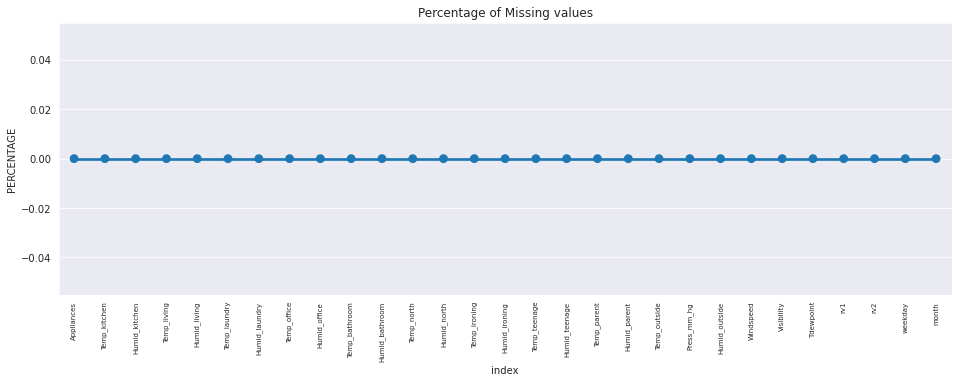

In [15]:
# plotting missing values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* **Conclusion-There is no missing value in dataset.**

--------------------------------------------------------------------------------------------------------

# 3.Data Visualization

3.1. **Histogram of all column values:-**

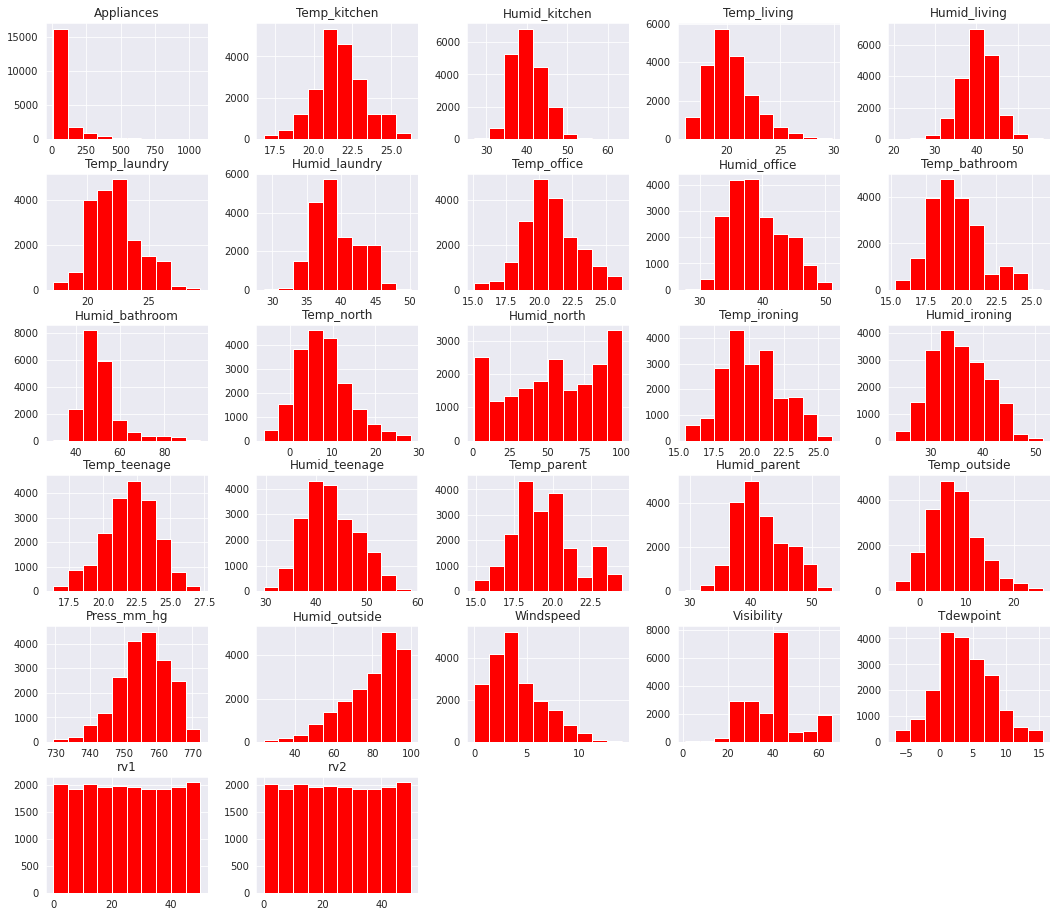

In [16]:
# Data distribution with the help of histogram
data.hist(figsize=(18,16),color='red')
plt.show()

* Most columns are partially normal distributed and most fo them are skewed a little.

-------------------------------------------------------------------------------------------------------------------

3.2 **Boxplot of different columns:-**

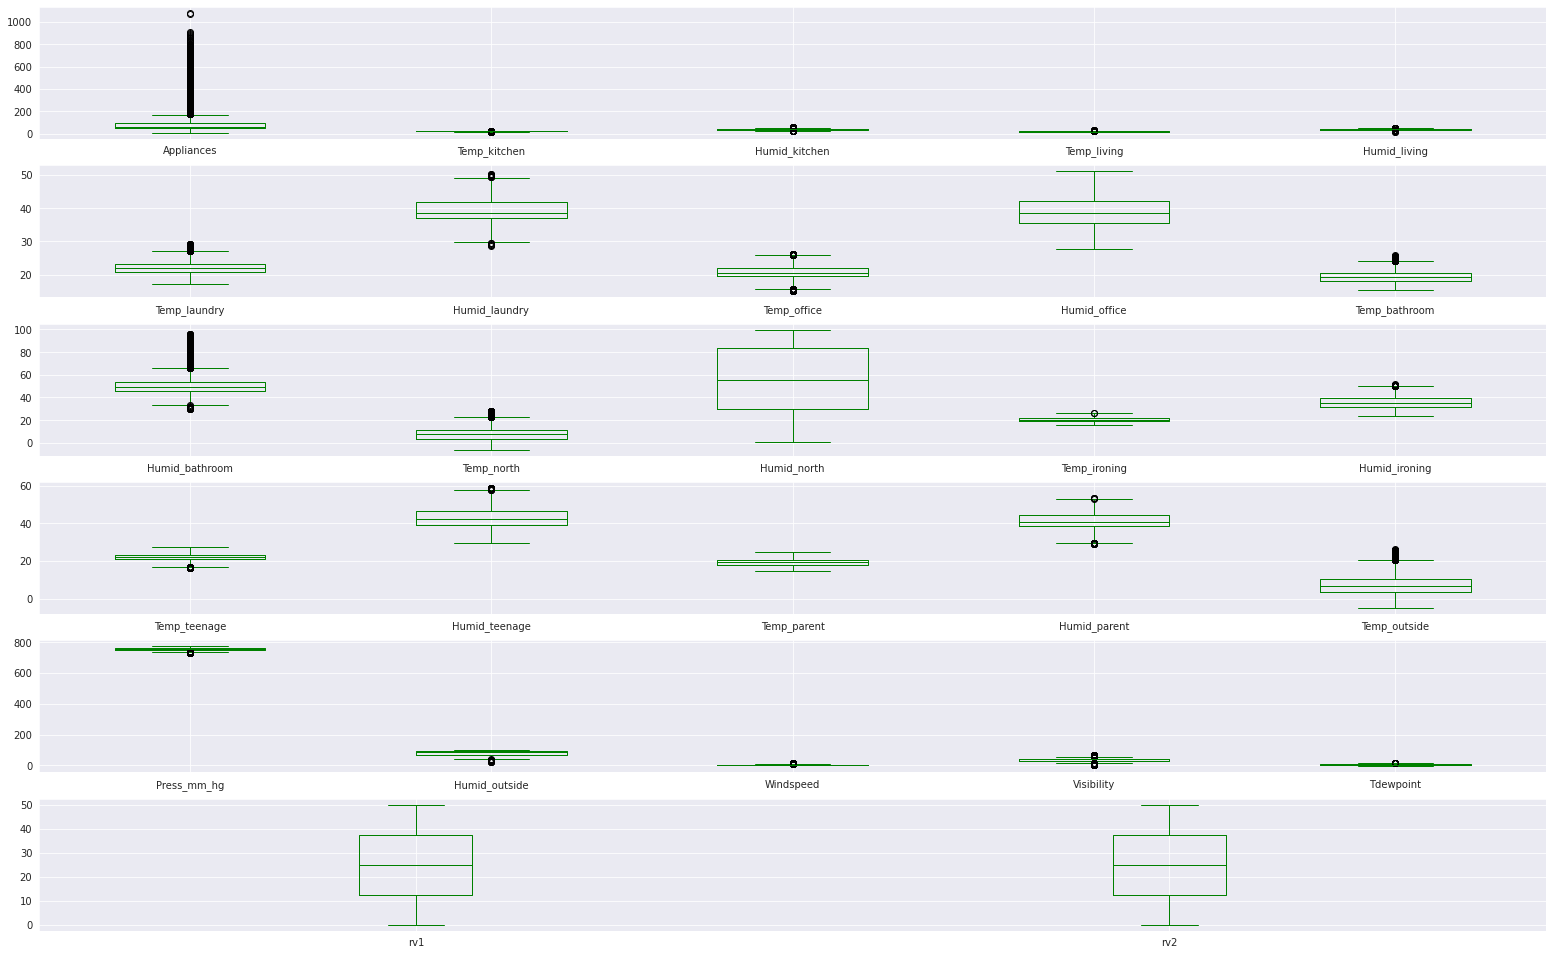

In [17]:
# Plotting box plot
a=[]
data2=data.drop(['month','weekday'],axis=1)
for i in range(0,30,5):
  a.append(list(data2.iloc[:,i:i+5].columns))
#----------------------------------------------------------------------------------------------
fig,ax=plt.subplots(6,1,figsize=(27,17))
for i in range(len(a)):
  data2.boxplot(column=a[i],ax=ax[i],color='green')

* Each column has different set of range so in future we need to normalize the value.

3.3. **Violin plot between Appliances and its usage in different month:-**

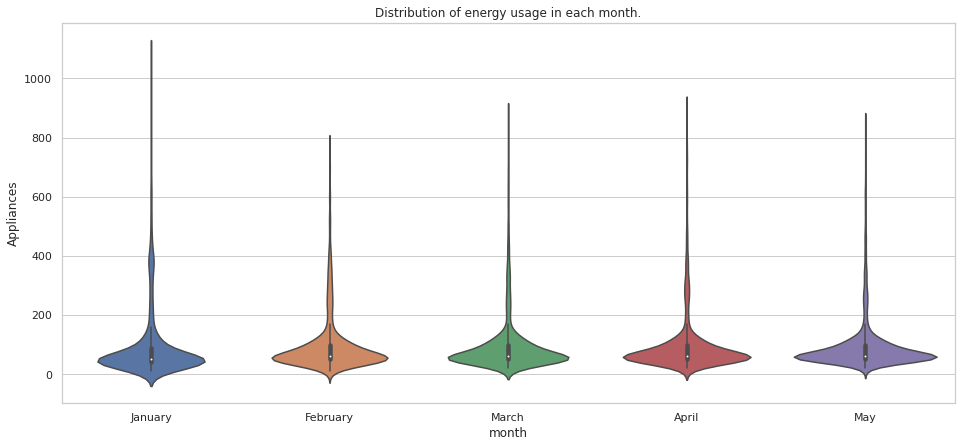

In [36]:
# Violin Plot distribution.
plt.figure(figsize=(16,7))

sns.violinplot(y='Appliances',data=data,x='month')
plt.title('Distribution of energy usage in each month.')
plt.show()

* In january we can see a peak of energy consumption.
* February has a lower energy assumption because days are less compared to other month.

3.4. **Distribution of energy usage on basis of week:**

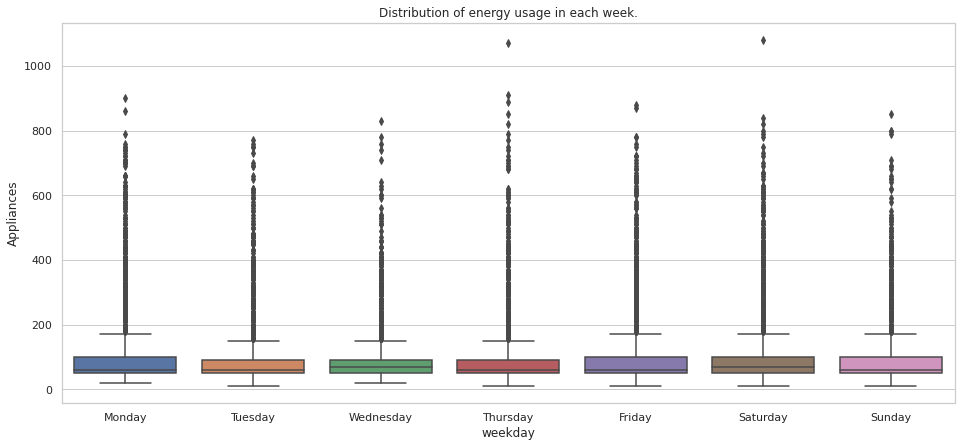

In [37]:
# Box plot Distribuiton between Appliances and weekday.
plt.figure(figsize=(16,7))

sns.boxplot(y='Appliances',data=data,x='weekday')
plt.title('Distribution of energy usage in each week.')
plt.show()

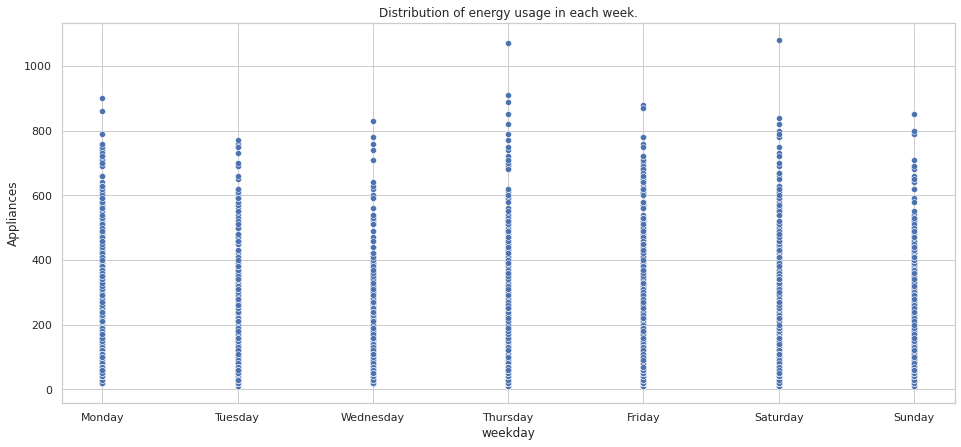

In [39]:
# Scatter Plot
plt.figure(figsize=(16,7))

sns.scatterplot(y='Appliances',data=data,x='weekday')
plt.title('Distribution of energy usage in each week.')
plt.show()

3.5. **Distribution of Windspeed each week and month**

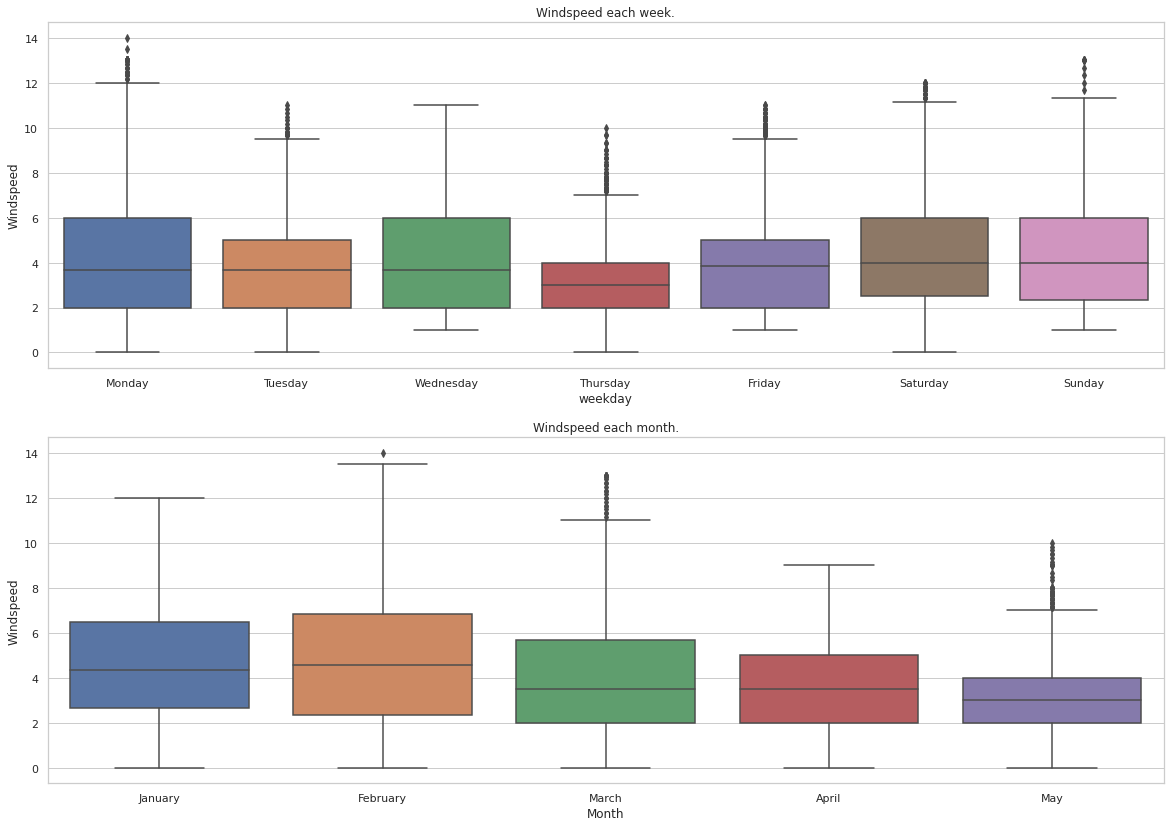

In [40]:
# Box plot 
fig,ax=plt.subplots(2,1,figsize=(20,14))

sns.boxplot(y='Windspeed',data=data,x='weekday',ax=ax[0])
ax[0].set_xlabel('weekday')
ax[0].set_title('Windspeed each week.')

#--------------------------------------------------------------------------------------------------

sns.boxplot(y='Windspeed',data=data,x='month',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_title('Windspeed each month.')

plt.show()

* Windspeed in april and may are lower than other month.

---------------------------------------------------------------------------------------------------

3.6. **Distribution of Visibility each week and month**

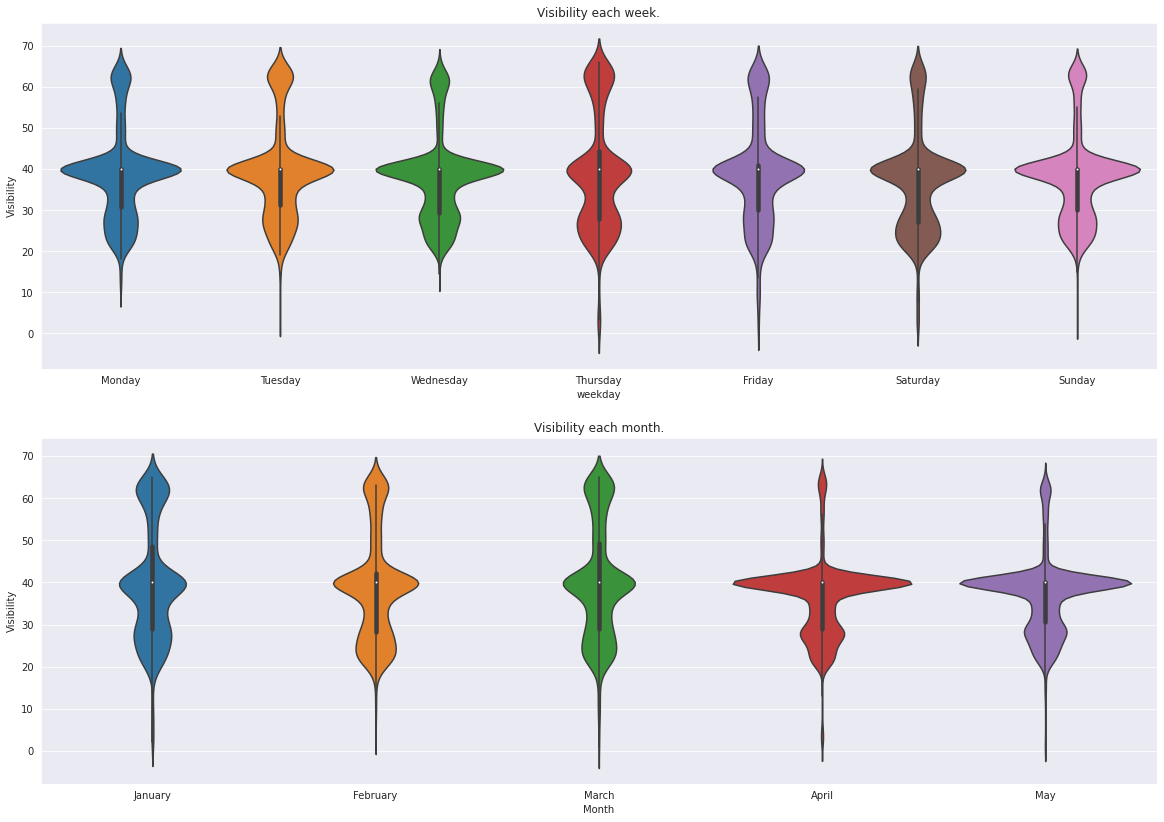

In [21]:
fig,ax=plt.subplots(2,1,figsize=(20,14))

sns.violinplot(y='Visibility',data=data,x='weekday',ax=ax[0])
ax[0].set_xlabel('weekday')
ax[0].set_title('Visibility each week.')

#--------------------------------------------------------------------------------------------------

sns.violinplot(y='Visibility',data=data,x='month',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_title('Visibility each month.')

plt.show()

* Visibility around april and may are around 40 and has huge probability around it.

----------------------------------------------------------------------------------------

**Temperature vs humidity in kitchen.**

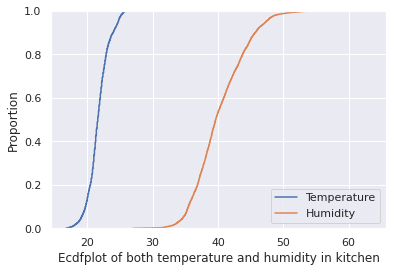

In [ ]:
# Temperature vs humidity in kitchen.


sns.ecdfplot(data['Temp_kitchen'],label='Temperature')
sns.ecdfplot(data['Humid_kitchen'],label='Humidity')
plt.xlabel('Ecdfplot of both temperature and humidity in kitchen')
plt.legend()
plt.show()

**3.8. Visibility vs Appliances:-**

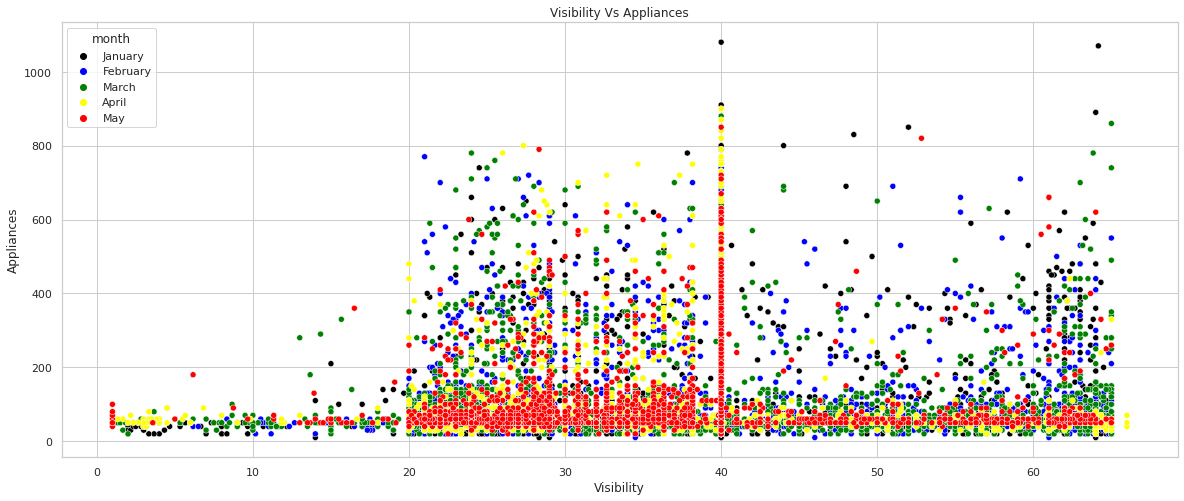

In [31]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,8
sns.scatterplot(x='Visibility',y='Appliances',data=data,hue='month',palette=['black','Blue','Green','yellow','red'])
plt.title('Visibility Vs Appliances')
plt.show()

* As we have seen visibility around may was most around 20-40 so we can see a huge red patch confirming that.

**3.9. Windspeed vs Appliances**

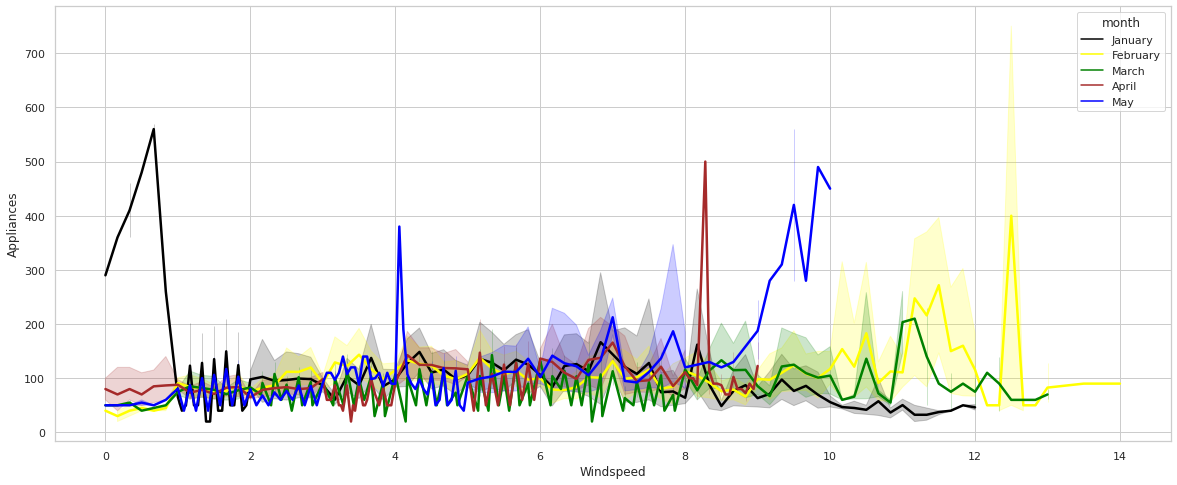

In [28]:
rcParams['figure.figsize'] = 20,8
sns.set_theme(style="whitegrid")
sns.lineplot(x='Windspeed',y='Appliances',data=data,hue='month',palette=['black','yellow','green','brown','blue'], linewidth=2.5)

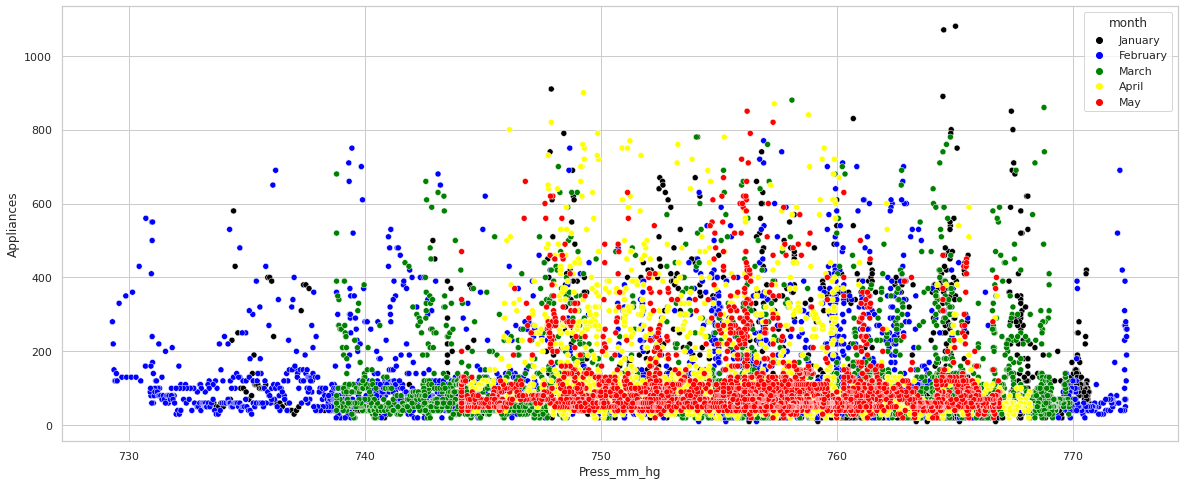

In [33]:
sns.set_theme(style="whitegrid")
sns.scatterplot(x='Press_mm_hg',y='Appliances',data=data,hue='month',palette=['black','Blue','Green','yellow','red'])

**3.9.** **Jointplot between each temperature columns**

In [ ]:
temp_columns=['Temp_kitchen','Temp_living','Temp_laundry','Temp_office','Temp_bathroom','Temp_north','Temp_ironing','Temp_teenage','Temp_parent','Temp_outside']
humid_columns=['Humid_kitchen','Humid_living','Humid_laundry','Humid_office','Humid_bathroom','Humid_north','Humid_ironing','Humid_teenage','Humid_parent','Humid_outside']


* We wanted to compare each humidity and temperature of each room with each other so we have used jointplot.

**Temperature vs temperature**

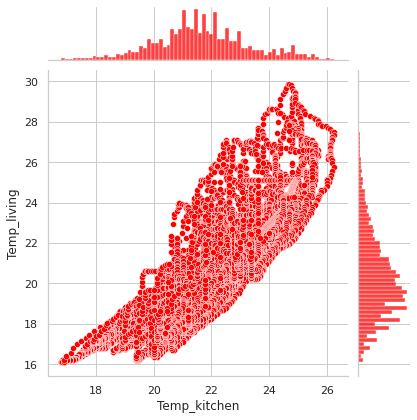

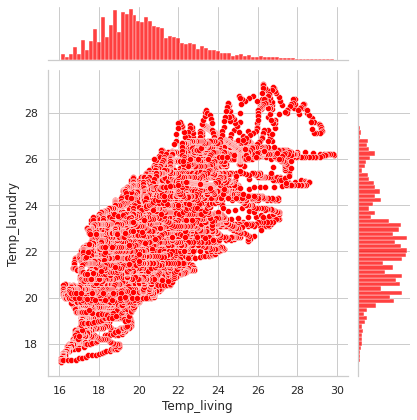

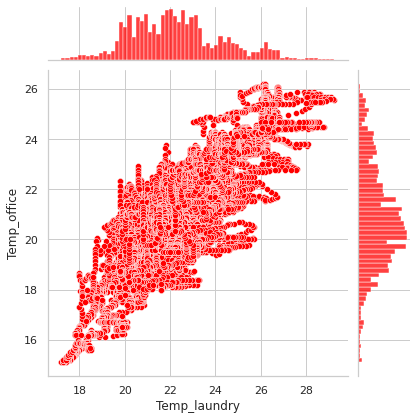

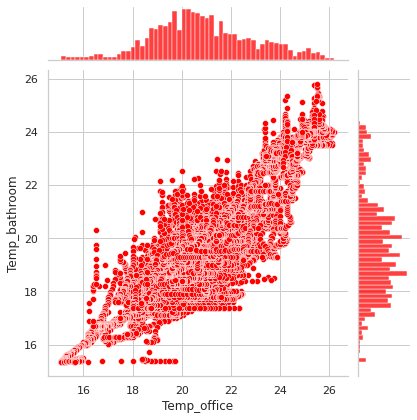

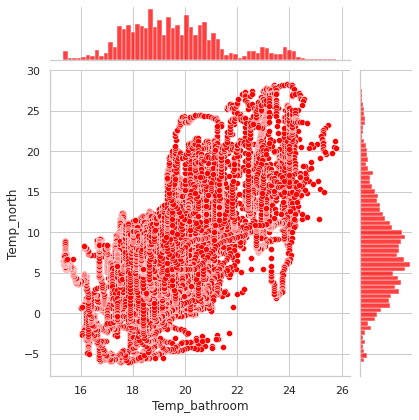

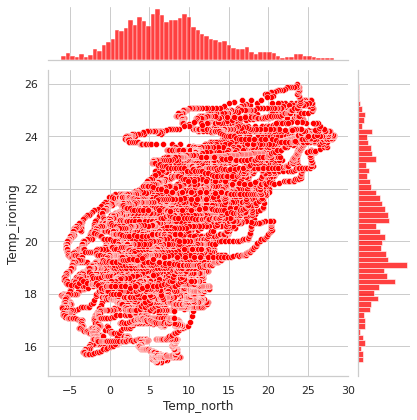

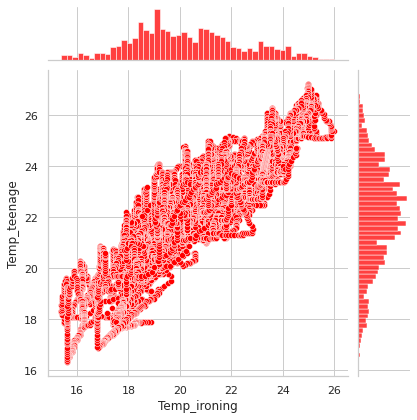

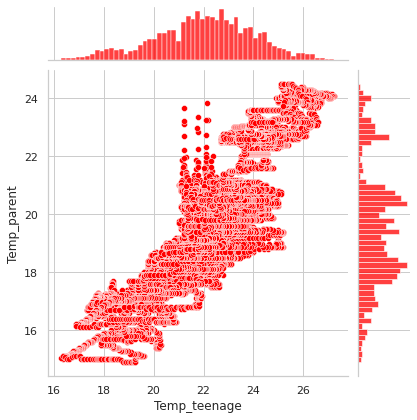

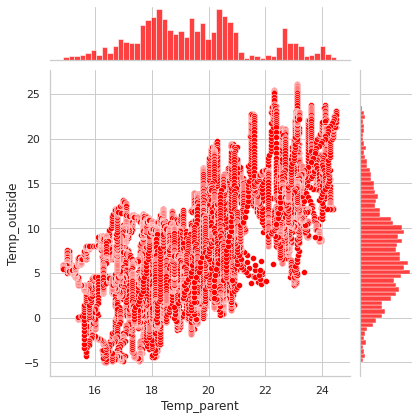

In [ ]:
for i in range(0,9):
  sns.jointplot(x=temp_columns[i],y=temp_columns[i+1],data=data,color='red')
plt.show()

**3.10. Jointplot between each Humidity columns**

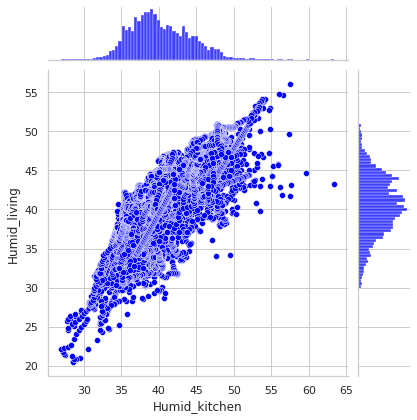

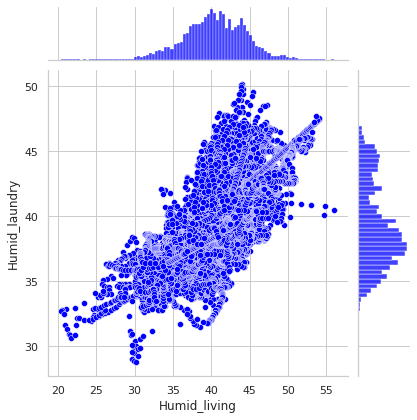

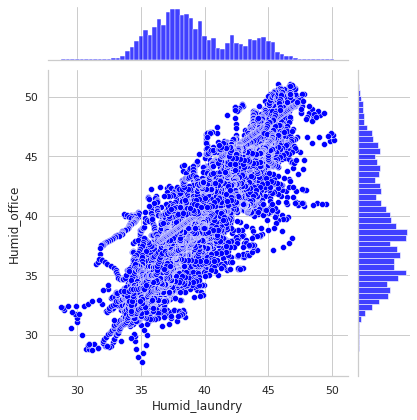

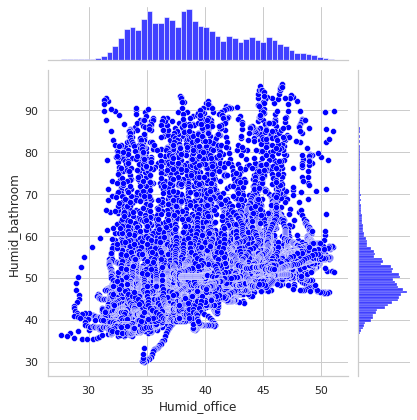

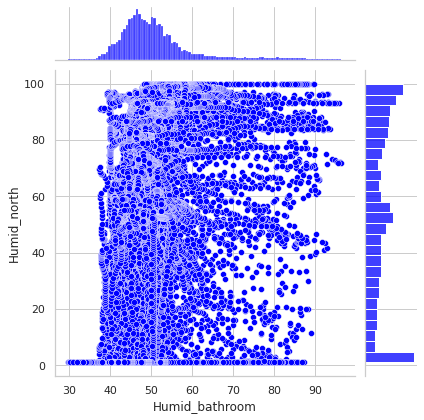

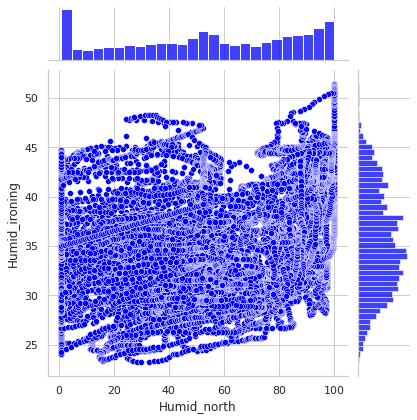

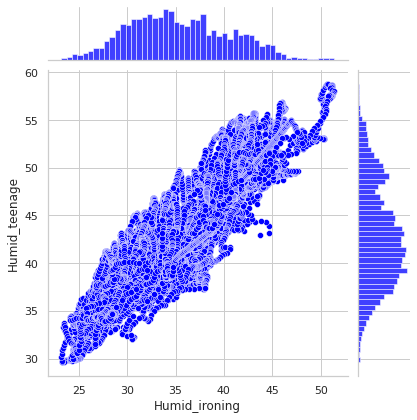

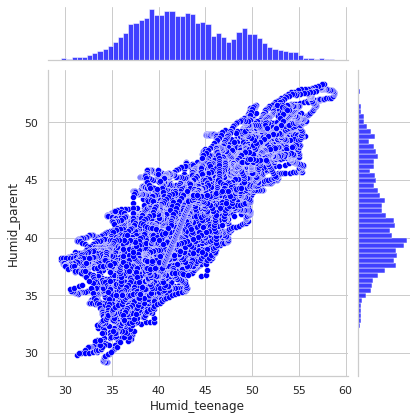

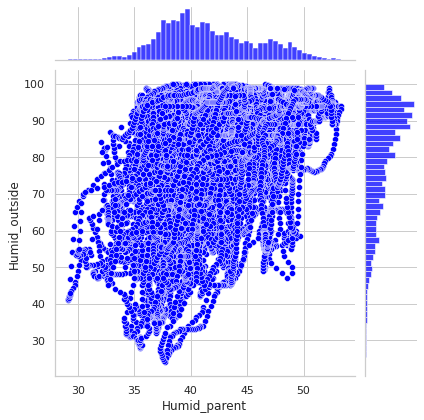

In [ ]:
for i in range(0,9):
  sns.jointplot(x=humid_columns[i],y=humid_columns[i+1],color='blue',data=data)
plt.show()

**3.11. Jointplot between each temperature and humidity columns:-**

**Temperature vs Humidity**

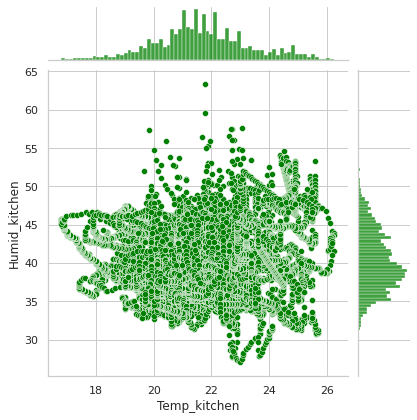

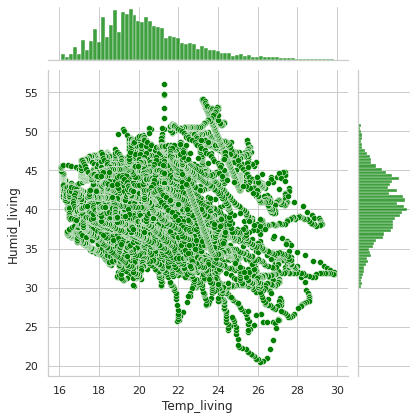

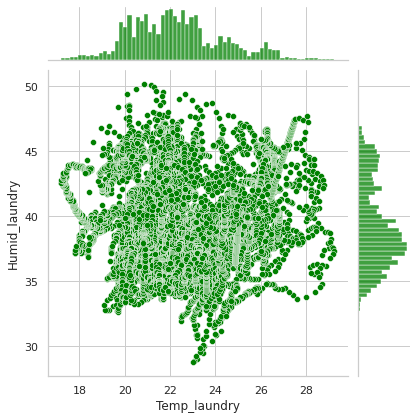

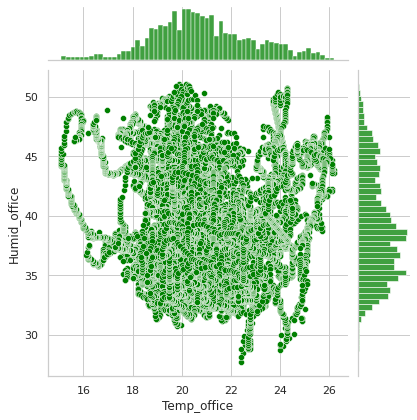

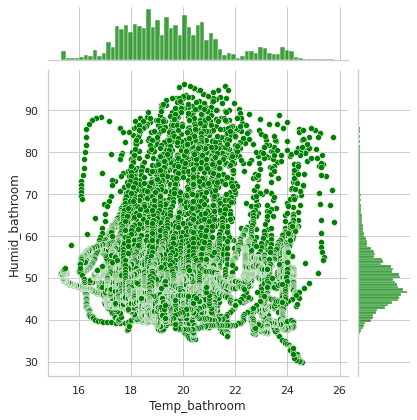

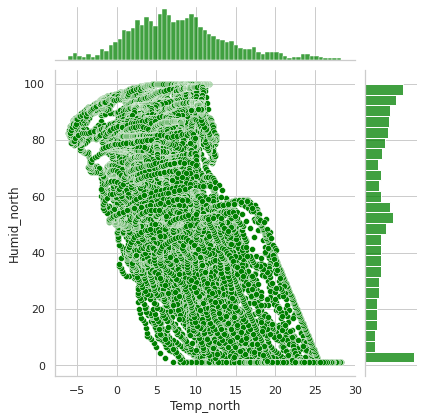

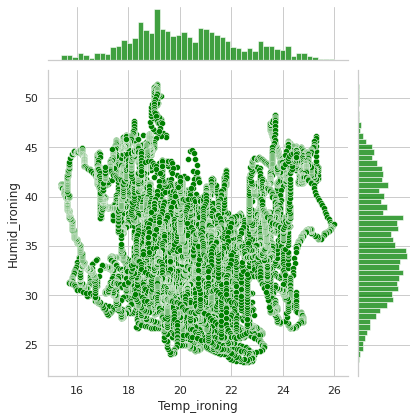

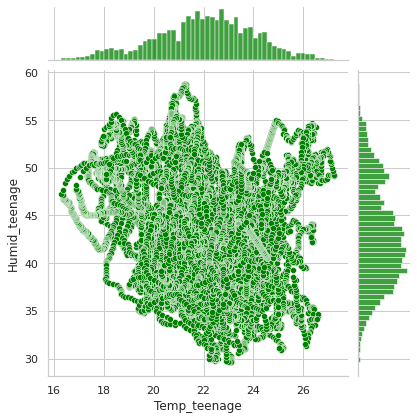

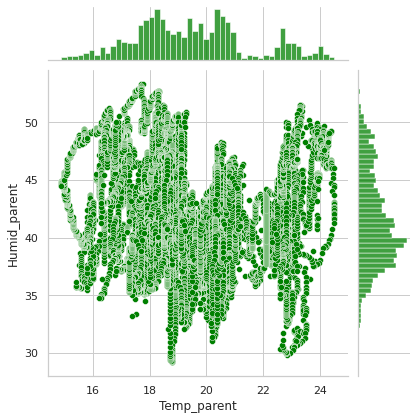

In [ ]:
for i in range(0,9):
   sns.jointplot(x=temp_columns[i],y=humid_columns[i],data=data,color='green')
plt.show()

# 4. Data Preparation for Modelling

**Correlation between each columns:-**

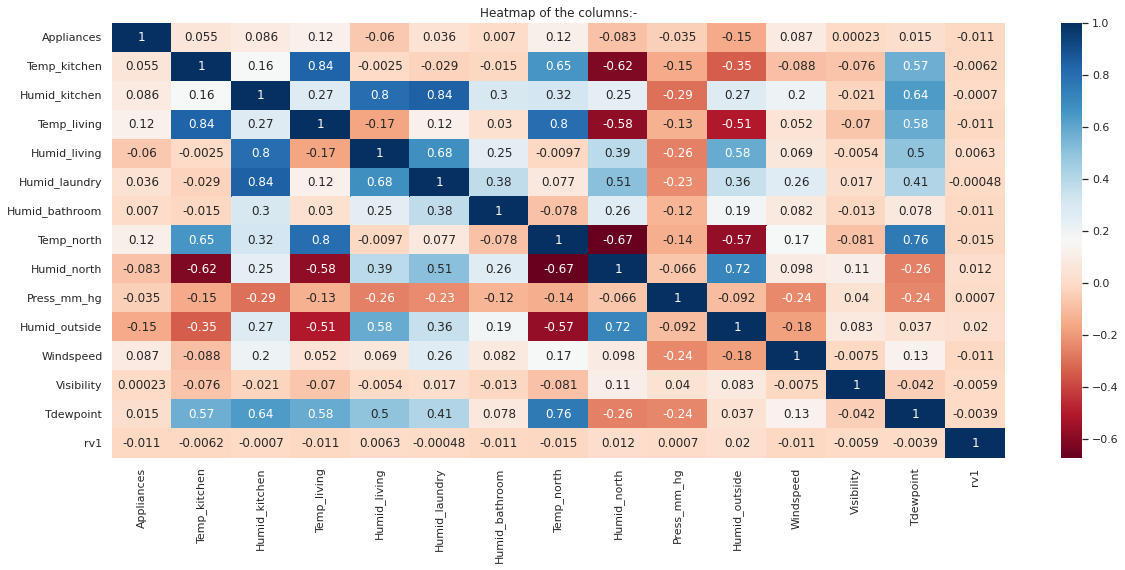

In [46]:
# Correlation Heatmap
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Heatmap of the columns:-')
plt.show()

reg1=data.drop('Appliances',axis=1).select_dtypes(exclude='object').columns

**4.1 Feature Selection with Correlation**

In [42]:
# With the following function we can select highly correlated features
# It will remove the first feature that is correlated with anything other feature

def correlation(dataset, thresold):
  col_corr = set()   # Set of all the names of correlated columns
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if (corr_matrix.iloc[i,j]) > thresold:                                  # we are interested in absolute coeff value
           colname = corr_matrix.columns[i]                                       # getting the name of column
           col_corr.add(colname)
  return col_corr
                                                 

In [43]:
corr_features = correlation(data, 0.85)
len(set(corr_features))

12

In [44]:
# Features with multicollinearity
corr_features

{'Humid_ironing',
 'Humid_office',
 'Humid_parent',
 'Humid_teenage',
 'Temp_bathroom',
 'Temp_ironing',
 'Temp_laundry',
 'Temp_office',
 'Temp_outside',
 'Temp_parent',
 'Temp_teenage',
 'rv2'}

In [45]:
# Dropping corr_features
data = data.drop(corr_features, axis=1)

**4.2  Label Encoding**

In [47]:
# Converting Categorical into numeric
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['month'] = label_encoder.fit_transform(data['month'])
data['weekday'] = label_encoder.fit_transform(data['weekday'])


In [48]:
data['month'].unique()

array([2, 1, 3, 0, 4])

In [49]:
data['weekday'].unique()

array([1, 5, 6, 4, 0, 2, 3])

4.2. **Creating group based on each continuous values**:-

In [50]:
reg=data.select_dtypes(exclude='object')

for i in reg.columns:
  data[i+'_group']=pd.cut(reg[i],bins=4,labels=['low','mid','high','extreme'])
  encode=LabelEncoder()
  data[i+'_group']=encode.fit_transform(data[i+'_group'])

4.3. **Splitting the test into train and validation:-**

In [51]:
# Using Train test split to split the data.
X = data.drop(['Appliances'],axis=1)
y = data['Appliances']

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
X_train.shape, X_test.shape

((13814, 33), (5921, 33))

In [52]:
y_train.shape, y_test.shape

((13814,), (5921,))

4.4. **Standard scaling the dataset:-**

In [55]:
# Transforming data between 0 and 1
trans = MinMaxScaler()
data = trans.fit_transform(data)

In [56]:
trans.data_max_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
trans.data_min_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
# Transforming Data into Mean =0 and standard deviation =1
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [59]:
print(X_train_scaled.mean(axis=0))      # Mean is approximately equal to zero

[ 9.93237312e-16 -2.88043964e-16  4.39781409e-16  1.30237021e-15
 -1.18869572e-15 -3.75485882e-16  1.36306519e-17  1.30905694e-16
  3.99815309e-15  2.28377714e-16 -1.97515861e-16 -2.34550085e-16
 -9.05281030e-17 -1.51223081e-16 -1.54309266e-17 -4.42353231e-17
  2.52038469e-16 -9.56717452e-17  5.91518855e-17 -1.71797650e-16
  1.19332499e-16  1.86714212e-16  1.74883835e-17  2.61297025e-16
  8.25554576e-17 -5.81231570e-17  2.67469395e-17 -1.92243628e-16
  7.40684479e-17 -3.39480386e-17  1.64596551e-17  9.92722948e-17
  5.14364222e-19]


In [60]:
print(X_train_scaled.std(axis=0))   # Standard deviation is 1

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# 5.Data Modelling and Selection

In [61]:
# Using different algorithms for selection
model=[]
model.append(('Linear Regression',LinearRegression()))
model.append(('SVR',SVR()))
model.append(('Decision Tree Regressor',DecisionTreeRegressor()))
model.append(('Random Forest Regressor',RandomForestRegressor()))
model.append(('Gradient Boosting Regressor',GradientBoostingRegressor()))
model.append(('xgboost',XGBRegressor()))
model.append(('Adaboost',AdaBoostRegressor()))
model.append(('LightBGM',LGBMRegressor()))

from sklearn.metrics import r2_score
scores={}
for name,mod in model:
  score=mod.fit(X_train,y_train)
  yhat=mod.predict(X_test)
  r2_squared=r2_score(y_test,yhat)
  
  adjusted_r_squared = 1 - (1-r2_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

  scores[name]=adjusted_r_squared


[11:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


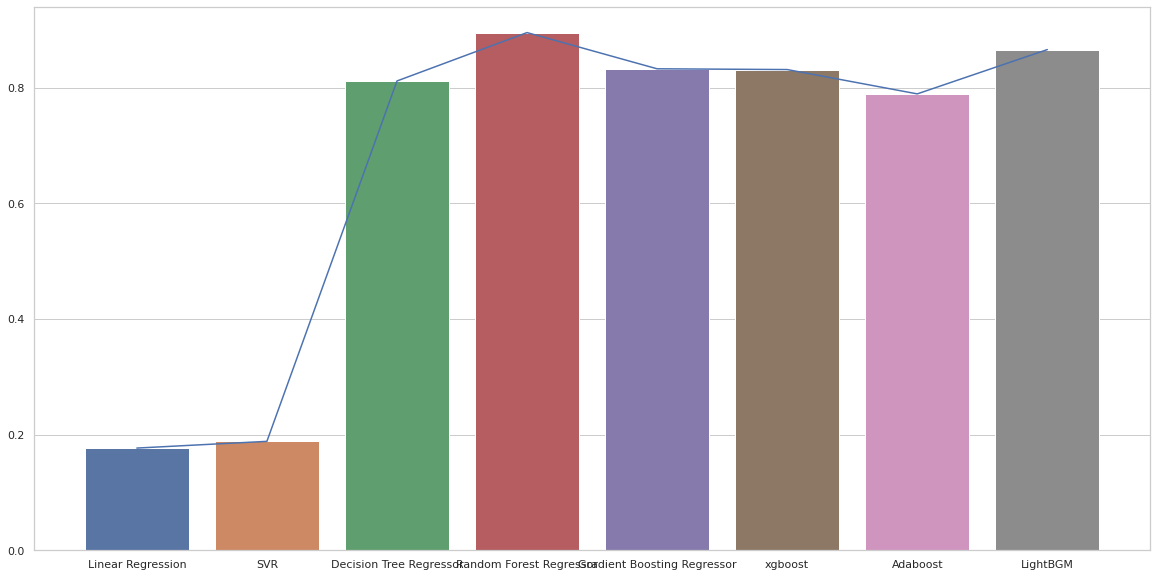

In [72]:
name = list(scores.keys())
scor = list(scores.values())

plt.figure(figsize=(20,10))
sns.barplot(x=name,y=scor)

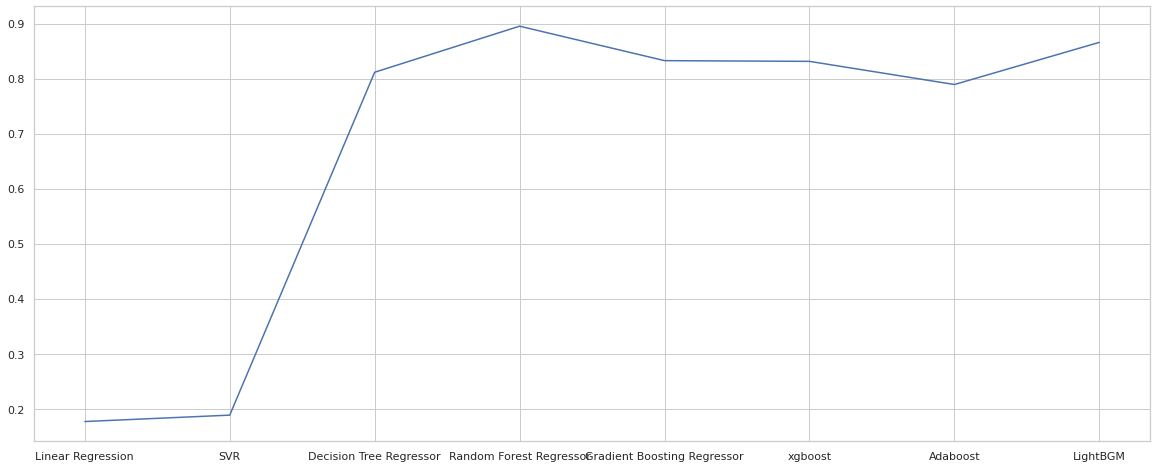

In [71]:
sns.lineplot(x=name, y=scor)

**Scoring:-**
* **Random Forest Regressor has the best Adjusted R2 score so we go with that algorithm.**

In [81]:
Scoring = pd.DataFrame([scores])
Scoring

Linear Regression       SVR  Decision Tree Regressor  \
0           0.176787  0.188412                 0.811626   

   Random Forest Regressor  Gradient Boosting Regressor   xgboost  Adaboost  \
0                 0.895311                     0.832696  0.831376  0.789297   

   LightBGM  
0  0.865925

* **Performing Ridge Regression to check best value of alpha.**

**Ridge Regressoion:-**

Text(0.5, 1.0, 'Ridge coefficients as a function of alpha')

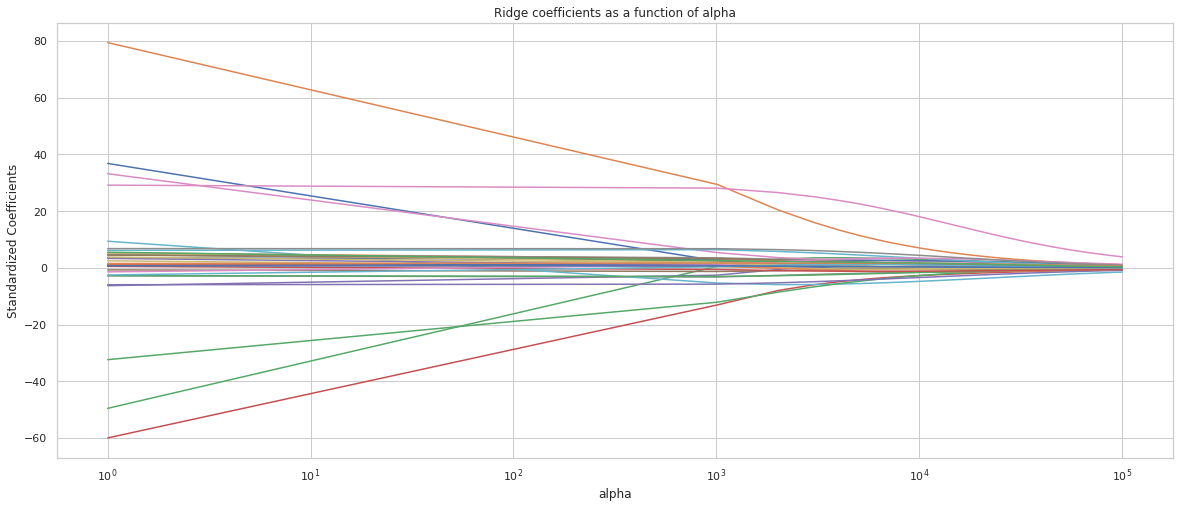

In [64]:
alphas = np.linspace(1, 100000, 100)
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train,y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("Standardized Coefficients")
plt.title("Ridge coefficients as a function of alpha")


**Lasso Regression:-**

Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

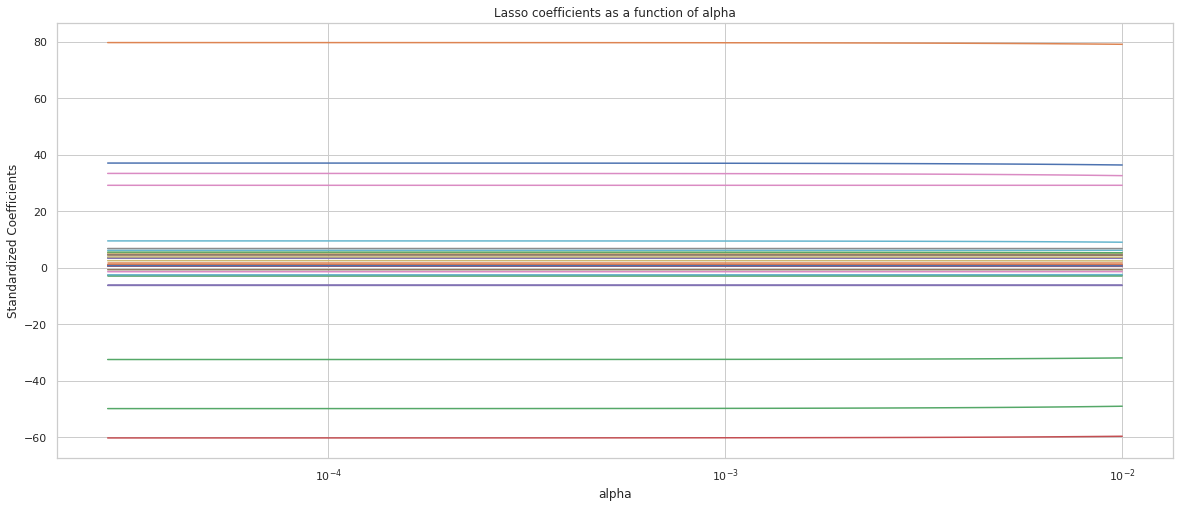

In [65]:
# Lasso Regression
alphas = np.linspace(2.7800706909230952e-05, 0.01, 100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("Standardized Coefficients")
plt.title("Lasso coefficients as a function of alpha")

**Random Forest Regressor**

In [66]:
model=RandomForestRegressor(bootstrap=False,max_depth=None,max_features=21,min_samples_split=2,n_estimators=413)
model.fit(X_train,y_train)
yhat=model.predict(X_test)
r2_squared=r2_score(y_test,yhat)
adjusted_r_squared = 1 - (1-r2_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(' Score of random Forest Regressor:-',adjusted_r_squared)

 Score of random Forest Regressor:- 0.898221676870253


# 6. Hyperparameter Tuning 

 **Random Forest Regressor**

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, X_train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(100, 500)}



random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist,
                                   n_iter=10, cv=5,  random_state=42)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'bootstrap': False, 'max_depth': None, 'max_features': 12, 'min_samples_split': 7, 'n_estimators': 485}


In [70]:
model=RandomForestRegressor(bootstrap=False,max_depth=None,max_features=12,min_samples_split=7,n_estimators=485)
model.fit(X_train,y_train)
yhat=model.predict(X_test)
r2_squared=r2_score(y_test,yhat)
adjusted_r_squared = 1 - (1-r2_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('Best score of random Forest Regressor:-',adjusted_r_squared)

Best score of random Forest Regressor:- 0.9008591812278887


Best Score of random Forest Regressor after hyperparameter tuning is 0.9

**Hyperparameter Tuning of Gradient Boosting Regressor**

In [ ]:
gbr = GradientBoostingRegressor()
parameters = {
    "n_estimators":[5,25,50],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,10]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbr,parameters,cv=5)
cv.fit(X_train,y_train)
cv.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50}

**Hyperparameter tuning of SVR**

In [ ]:

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)

**Conclusion:-**
* **Linear Regression has the least Adj R2 score,hence it is underfitting.**
* **Random Forest Regressor is the best model to get score of about 90.**
